In [3]:
import pandas as pd
%config Completer.use_jedi = False

In [4]:
df_headbrain=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/headbrain.csv')

In [5]:
df_headbrain.head()

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


### lets check the null vales without usig visualisation

In [14]:
df_headbrain.isnull().sum()

Gender         0
AgeRange       0
HeadSize       0
BrainWeight    0
dtype: int64

### lets check whether the null values are present in the dataset or not using heatmap

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

Gender         0
AgeRange       0
HeadSize       0
BrainWeight    0
dtype: int64

<AxesSubplot:>

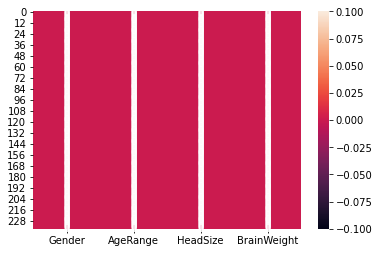

In [11]:
sns.heatmap(df_headbrain.isnull(), annot=True)

<AxesSubplot:>

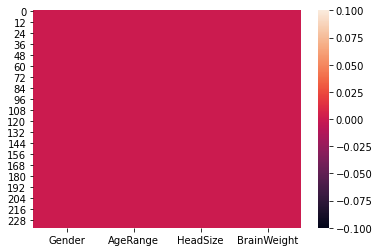

In [13]:
sns.heatmap(df_headbrain.isnull())

### Lets check whether their are outliers present in the dataset or not

In [37]:
from scipy.stats import zscore
z_score=abs(zscore(df_headbrain))
print(df_headbrain.shape)
z_score[z_score>3]

(237, 4)


array([3.05360475])

### Lets check the how Brain Weight(grams) is changing with respect to Head Size(cm^3)

<AxesSubplot:xlabel='BrainWeight', ylabel='HeadSize'>

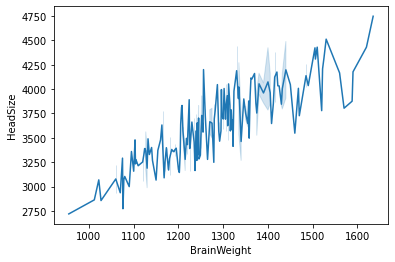

In [47]:
sns.lineplot(x=df_headbrain.BrainWeight,y=df_headbrain.HeadSize,data=df_headbrain)
#The below graph clearly shows that with increase in head size their is increase in brain weight too

### lets check what is the average brain size according to gender

<AxesSubplot:xlabel='Gender', ylabel='BrainWeight'>

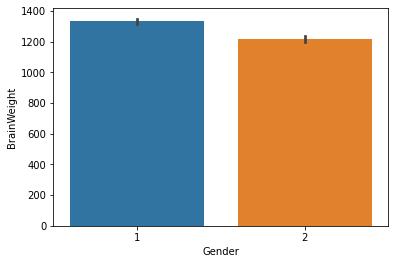

In [60]:
sns.barplot(x=df_headbrain['Gender'],y=df_headbrain['BrainWeight'],data=df_headbrain)

### Now lets check what is the average brain size according to age range

<AxesSubplot:xlabel='Gender', ylabel='AgeRange'>

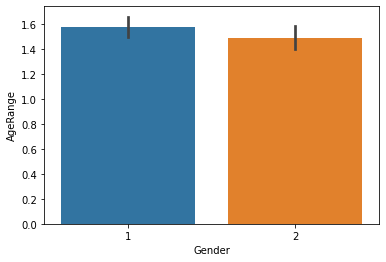

In [62]:
sns.barplot(x=df_headbrain['Gender'],y=df_headbrain['AgeRange'],data=df_headbrain)

### Lets draw histogram for brain weight

<AxesSubplot:xlabel='BrainWeight', ylabel='Count'>

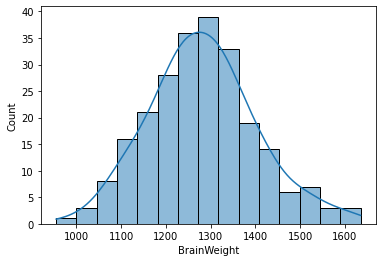

In [65]:
sns.histplot(df_headbrain.BrainWeight,kde=True)

### lets hcek skewnesss of the dataset

In [69]:
df_headbrain.skew()
#Below shows acceptable level of skewness

Gender         0.265554
AgeRange      -0.144748
HeadSize       0.238807
BrainWeight    0.265478
dtype: float64

### Now let seprate input and output variable to be used for the linear regression problem

In [82]:
df_headbrain.head()

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [94]:
x=df_headbrain[['HeadSize']]
y=df_headbrain[['BrainWeight']]
x

,HeadSize
0,4512
1,3738
2,4261
3,3777
4,4177
...,...
232,3214
233,3394
234,3233
235,3352


### scaling down using standardscaler 

In [98]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 2.40886829],
       [ 0.28535333],
       [ 1.72023489],
       [ 0.39235214],
       [ 1.4897759 ],
       [-0.13441126],
       [ 0.41430062],
       [-0.2057438 ],
       [-0.05759159],
       [ 0.95478182],
       [-0.52399669],
       [ 0.98496097],
       [ 0.01648451],
       [ 1.57482624],
       [ 0.54324791],
       [ 0.66396452],
       [-0.37584448],
       [-0.46089482],
       [-1.47875536],
       [ 2.16743507],
       [ 0.66945164],
       [ 1.13036962],
       [ 0.46642825],
       [ 0.20853367],
       [ 3.05360475],
       [ 2.16469151],
       [ 1.10293403],
       [ 1.06452419],
       [-0.49381754],
       [ 1.48428878],
       [ 0.41978774],
       [ 0.44447977],
       [ 1.28675251],
       [ 1.44587895],
       [ 1.43764827],
       [ 0.49386384],
       [-0.2935377 ],
       [ 0.31278892],
       [-0.82304466],
       [-0.38956228],
       [ 0.89991063],
       [-0.35389601],
       [ 1.8683871 ],
       [ 0.46642825],
       [ 0.62829825],
       [ 1

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn import linear_model

In [102]:
max_r_score=0
for r_state in range(30,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_pred,y_test)
    print('r2_score corresponding to random state: ',r_state,'is',r2_scr)
    if r2_scr>max_r_score:
        max_r_score= r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

r2_score corresponding to random state:  30 is 0.5074918542791438
r2_score corresponding to random state:  31 is 0.41641028399914226
r2_score corresponding to random state:  32 is 0.45522985991555076
r2_score corresponding to random state:  33 is 0.501368165312276
r2_score corresponding to random state:  34 is 0.6184480138530777
r2_score corresponding to random state:  35 is 0.049670618433883984
r2_score corresponding to random state:  36 is 0.41557528268287325
r2_score corresponding to random state:  37 is 0.14928054361755194
r2_score corresponding to random state:  38 is 0.19064338593786911
r2_score corresponding to random state:  39 is 0.6537667385958885
r2_score corresponding to random state:  40 is 0.38566961948318534
r2_score corresponding to random state:  41 is 0.39492577173047505
r2_score corresponding to random state:  42 is 0.5845506579649886
r2_score corresponding to random state:  43 is 0.44705512040605877
r2_score corresponding to random state:  44 is 0.32610070810841707


### Lets do the cross validation

In [103]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LogisticRegression(),x,y,cv=5,scoring='r2')

D:\anaconda\envs\ml\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
D:\anaconda\envs\ml\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\envs\ml\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\envs\ml\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\a

array([0.43481292, 0.23423387, 0.49740272, 0.51081322, 0.42661345])

In [107]:
cross_val_score(linear_model.LogisticRegression(),x,y,cv=5,scoring='r2').mean()
#the Below cross validation score is less and it shows that we further need to improve our model using more data

D:\anaconda\envs\ml\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
D:\anaconda\envs\ml\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\envs\ml\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\envs\ml\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\a

0.4207752353199544

### since maximum r2 score is comming around random state 91 we will use that to create our final model

In [108]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 91,test_size=0.20)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

### Lets evaluate RMSE and r2 score using sklearn library

In [110]:
import numpy as np
print("r2 score is: ",r2_score(y_test,y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is:  0.7602597914098643
RMSE is :  50.40167425523838


### Lets save the model using Pickle

In [117]:
import pickle
# Save the model as a pickle in a file 

pickle.dump(lr,open('lr_headbrain.pkl', 'wb'))

### Lets Load the model using Pickle

In [120]:
loaded_model = pickle.load(open('lr_headbrain.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.7602597914098643


### Lets save the model using joblib